## Import Library

In [1]:
# Menginstal berbagai library Python yang dibutuhkan
!pip install tensorflow tensorflowjs keras opendatasets pandas numpy matplotlib Pillow scipy scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [40]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import uuid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm as tq
from google.colab import files

# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image, ImageOps
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau


# menonaktifkan warning yang mungkin muncul, seperti warning FutureWarning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Dataset

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eviafiyatus","key":"1c589be636b2247f76c6e97cf60fd0df"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mostafaabla/garbage-classification
!unzip garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classification/pa

In [6]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sumn2u/garbage-classification-v2
!unzip garbage-classification-v2.zip

Streaming output truncated to the last 5000 lines.
  inflating: garbage-dataset/paper/paper_847.jpg  
  inflating: garbage-dataset/paper/paper_848.jpg  
  inflating: garbage-dataset/paper/paper_849.jpg  
  inflating: garbage-dataset/paper/paper_851.jpg  
  inflating: garbage-dataset/paper/paper_852.jpg  
  inflating: garbage-dataset/paper/paper_853.jpg  
  inflating: garbage-dataset/paper/paper_855.jpg  
  inflating: garbage-dataset/paper/paper_856.jpg  
  inflating: garbage-dataset/paper/paper_857.jpg  
  inflating: garbage-dataset/paper/paper_859.jpg  
  inflating: garbage-dataset/paper/paper_861.jpg  
  inflating: garbage-dataset/paper/paper_863.jpg  
  inflating: garbage-dataset/paper/paper_865.jpg  
  inflating: garbage-dataset/paper/paper_868.jpg  
  inflating: garbage-dataset/paper/paper_870.jpg  
  inflating: garbage-dataset/paper/paper_871.jpg  
  inflating: garbage-dataset/paper/paper_873.jpg  
  inflating: garbage-dataset/paper/paper_874.jpg  
  inflating: garbage-dataset/pa

In [7]:
!wget https://github.com/fannyahdita/DSA_tugas_akhir/raw/master/dataset-sampah.zip -O dataset-sampah.zip
!unzip dataset-sampah.zip -d dataset_sampah

--2025-06-04 10:03:21--  https://github.com/fannyahdita/DSA_tugas_akhir/raw/master/dataset-sampah.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fannyahdita/DSA_tugas_akhir/master/dataset-sampah.zip [following]
--2025-06-04 10:03:22--  https://raw.githubusercontent.com/fannyahdita/DSA_tugas_akhir/master/dataset-sampah.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36197663 (35M) [application/zip]
Saving to: ‘dataset-sampah.zip’

dataset-sampah.zip  100%[===================>]  34.52M  --.-KB/s    in 0.1s    

2025-06-04 10:03:23 (277 MB/s) - ‘dataset-sampah.zip’ saved [36197663/36197663

## Preprocessing

In [8]:
# Lokasi folder asal dan target
base_path = "/content/garbage_classification"
target_folder = os.path.join(base_path, "glass")
os.makedirs(target_folder, exist_ok=True)

# Folder-foler glass varian
glass_variants = ["brown-glass", "green-glass", "white-glass"]

# Gabungkan isi semua varian ke folder "glass"
for variant in glass_variants:
    variant_path = os.path.join(base_path, variant)
    for filename in os.listdir(variant_path):
        src = os.path.join(variant_path, filename)

        if not os.path.isfile(src):
            continue

        dst = os.path.join(target_folder, filename)

        # Hindari overwrite
        if os.path.exists(dst):
            base, ext = os.path.splitext(filename)
            i = 1
            while os.path.exists(dst):
                dst = os.path.join(target_folder, f"{base}_{i}{ext}")
                i += 1

        shutil.copy2(src, dst)

print("Penyatuan folder glass selesai.")

Penyatuan folder glass selesai.


In [9]:
folders_to_delete = ["brown-glass", "green-glass", "white-glass"]
base_path = "/content/garbage_classification"

for folder in folders_to_delete:
    full_path = os.path.join(base_path, folder)
    if os.path.exists(full_path):
        shutil.rmtree(full_path)
        print(f"Folder '{folder}' dihapus.")
    else:
        print(f"Folder '{folder}' tidak ditemukan.")

Folder 'brown-glass' dihapus.
Folder 'green-glass' dihapus.
Folder 'white-glass' dihapus.


In [10]:
!mv dataset_sampah/dataset-sampah/* dataset_sampah/
!rm -r dataset_sampah/dataset-sampah

In [11]:
import os
import shutil
from zipfile import ZipFile

# Path folder yang akan digabung
source_dirs = ["/content/garbage_classification", "/content/garbage-dataset", "/content/dataset_sampah"]
target_dir = "/content/combined_dataset"

# Buat folder gabungan
os.makedirs(target_dir, exist_ok=True)

# Gabungkan semua folder label
for src_dir in source_dirs:
    for label in os.listdir(src_dir):
        src_label_path = os.path.join(src_dir, label)

        if not os.path.isdir(src_label_path):
            continue  # Lewati file jika ada

        dst_label_path = os.path.join(target_dir, label)
        os.makedirs(dst_label_path, exist_ok=True)

        for filename in os.listdir(src_label_path):
            src_file = os.path.join(src_label_path, filename)

            if not os.path.isfile(src_file):
                continue

            dst_file = os.path.join(dst_label_path, filename)

            # Hindari overwrite jika nama file sama
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(filename)
                i = 1
                while os.path.exists(dst_file):
                    dst_file = os.path.join(dst_label_path, f"{base}_{i}{ext}")
                    i += 1

            shutil.copy2(src_file, dst_file)

print("Penggabungan selesai. Folder gabungan ada di:", target_dir)

Penggabungan selesai. Folder gabungan ada di: /content/combined_dataset


In [12]:
for label in os.listdir("/content/combined_dataset"):
    folder_path = os.path.join("/content/combined_dataset", label)
    if os.path.isdir(folder_path):
        count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"{label}: {count} file")

cardboard: 3119 file
glass: 5072 file
battery: 1889 file
shoes: 3954 file
biological: 1982 file
clothes: 10652 file
plastic: 3331 file
paper: 3324 file
trash: 1781 file
metal: 2199 file


In [13]:
import shutil

wrong_label_path = os.path.join(target_dir, "dataset-sampah")

if os.path.exists(wrong_label_path):
    shutil.rmtree(wrong_label_path)
    print("Folder 'dataset-sampah' berhasil dihapus dari dataset gabungan.")
else:
    print("Folder 'dataset-sampah' tidak ditemukan di folder gabungan.")


Folder 'dataset-sampah' tidak ditemukan di folder gabungan.


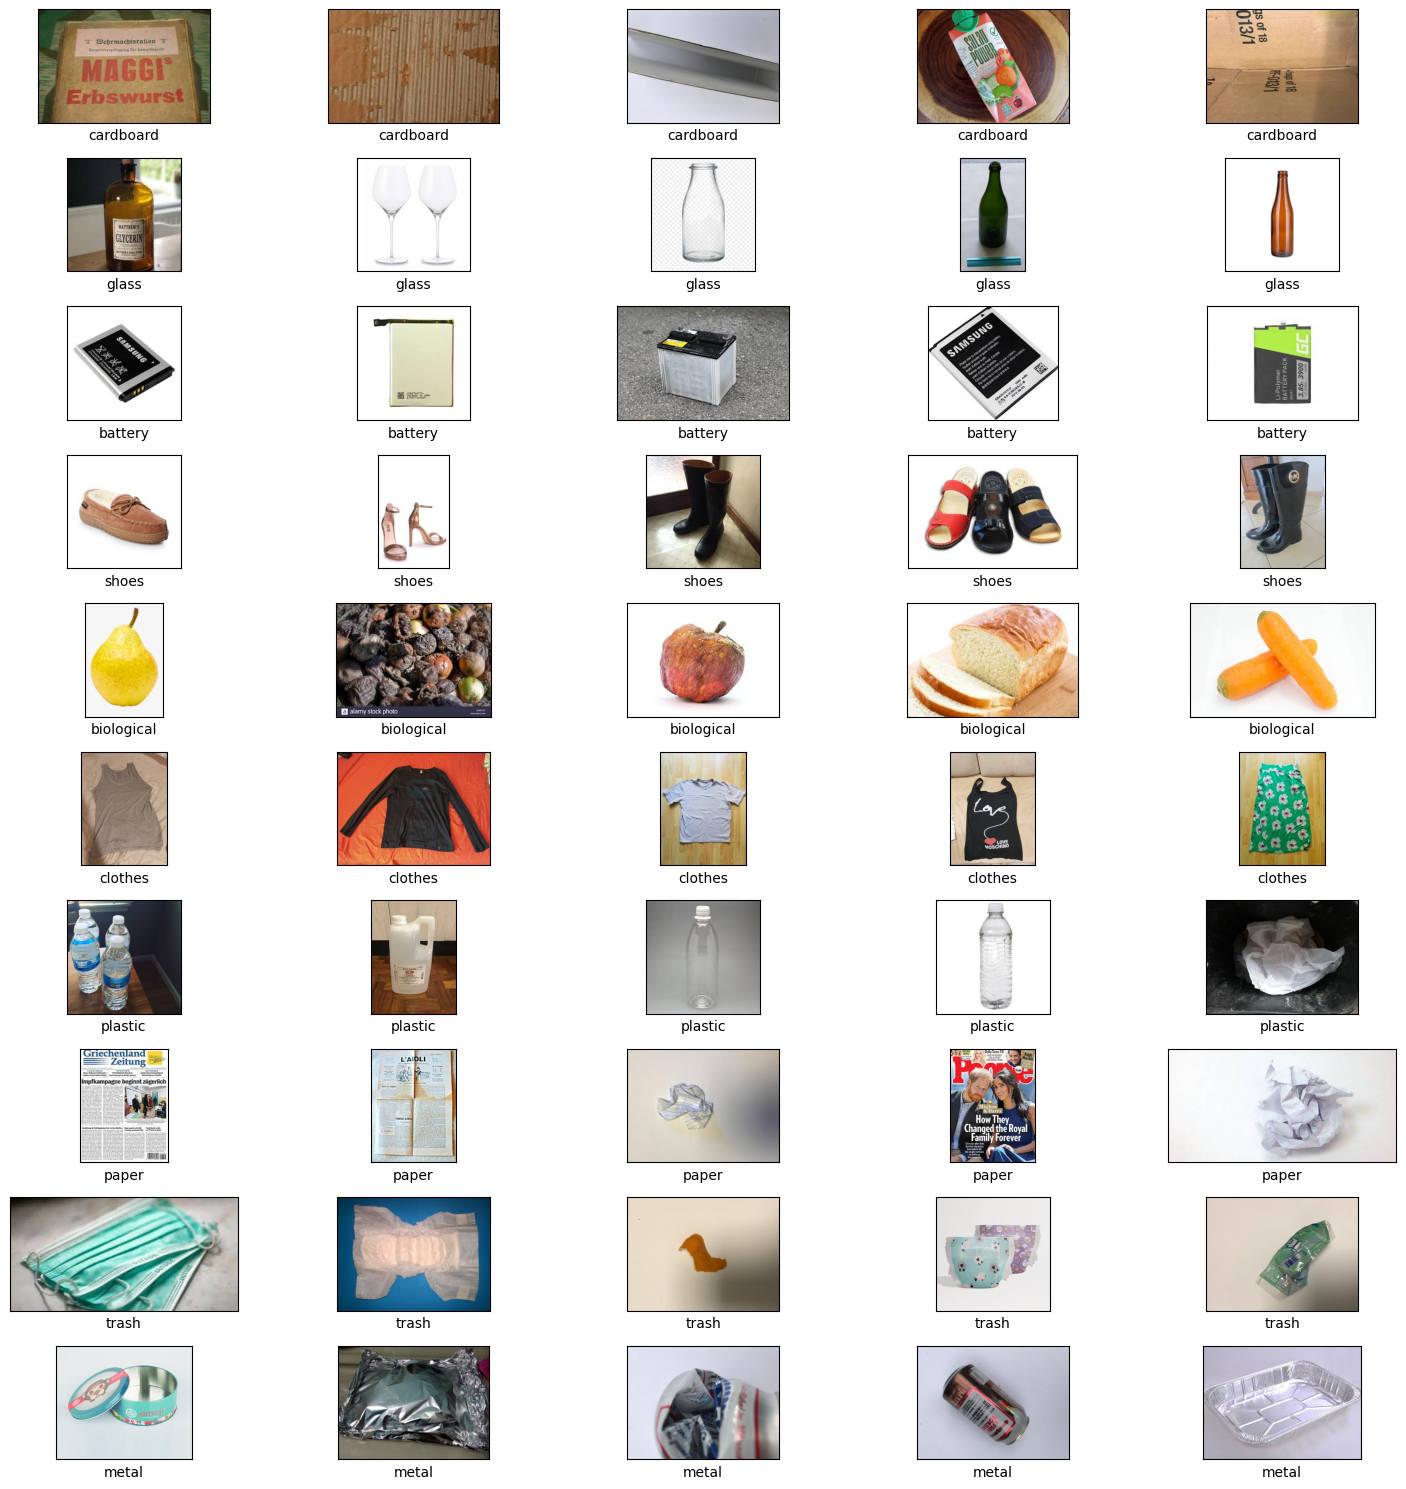

In [14]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "/content/combined_dataset"
for i in os.listdir(path):
    lung_image[i] = os.listdir(os.path.join(path, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
path = "/content/combined_dataset"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

In [15]:
import glob

base_dir = "/content/combined_dataset"
data = []

for label in os.listdir(base_dir):
    label_folder = os.path.join(base_dir, label)
    if not os.path.isdir(label_folder):
        continue
    for file in os.listdir(label_folder):
        if file.endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(label_folder, file)
            data.append({'path': path, 'file_name': file, 'labels': label})

distribution_train = pd.DataFrame(data)

## Augmentasi Dataset

In [16]:
# --- Fungsi augmentasi sederhana ---
def augment_and_save(src_path, save_dir):
    img = Image.open(src_path)

    # Pilih augmentasi secara acak
    op = random.choice(['flip', 'rotate'])
    if op == 'flip':
        aug = ImageOps.mirror(img)
    else:
        angle = random.choice([90, 180, 270])
        aug = img.rotate(angle, expand=True)

    # Konversi ke RGB jika bukan RGB
    if aug.mode != 'RGB':
        aug = aug.convert("RGB")

    # Simpan dengan nama unik
    new_name = f"{uuid.uuid4().hex}.png"
    save_path = os.path.join(save_dir, new_name)
    aug.save(save_path)

    return new_name, save_path

# --- Hitung target balancing ---
class_counts = distribution_train['labels'].value_counts()
min_count    = class_counts.min()
target = min(min_count * 5, 5000)

# Folder output
output_dir = "/content/balanced_dataset"
os.makedirs(output_dir, exist_ok=True)

# DataFrame baru untuk menyimpan path hasil oversampling+augmentasi
new_rows = []

for label, group in distribution_train.groupby('labels'):
    label_folder = os.path.join(output_dir, label)
    os.makedirs(label_folder, exist_ok=True)

    if len(group) > target:
        # Undersample: ambil random subset
        sampled = group.sample(n=target, random_state=42)
        for _, row in tqdm(sampled.iterrows(), total=len(sampled), desc=f"Copying {label}"):
            dst = os.path.join(label_folder, row['file_name'])
            shutil.copyfile(row['path'], dst)
            new_rows.append({'path': dst, 'file_name': row['file_name'], 'labels': label})
    else:
        # Oversample + augmentasi
        repeats = target // len(group)
        rem     = target % len(group)

        # Ulangi full group beberapa kali
        for _ in range(repeats):
            for _, row in tqdm(group.iterrows(), total=len(group), desc=f"Augmenting {label} (repeat)"):
                fn, saved = augment_and_save(row['path'], label_folder)
                new_rows.append({'path': saved, 'file_name': fn, 'labels': label})

        # Ambil sisanya secara acak dan augment
        extra = group.sample(n=rem, random_state=42)
        for _, row in tqdm(extra.iterrows(), total=len(extra), desc=f"Augmenting {label} (extra)"):
            fn, saved = augment_and_save(row['path'], label_folder)
            new_rows.append({'path': saved, 'file_name': fn, 'labels': label})

# Gabungkan semua metadata jadi DataFrame
balanced_df = pd.DataFrame(new_rows)

Augmenting trash (extra): 100%|██████████| 1438/1438 [00:38<00:00, 37.21it/s]


<ipython-input-17-da451013970b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='viridis')


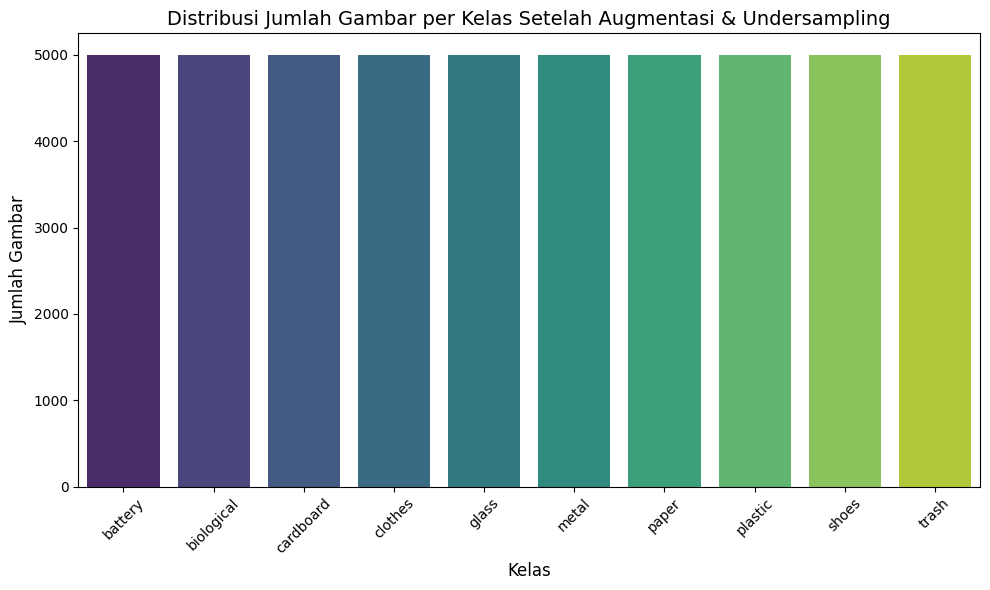

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah gambar per kelas setelah proses oversampling + undersampling
class_counts_after = balanced_df['labels'].value_counts()

# Membuat plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='viridis')

# Menambahkan label dan judul
plt.title("Distribusi Jumlah Gambar per Kelas Setelah Augmentasi & Undersampling", fontsize=14)
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45)  # Rotasi label kelas jika terlalu panjang

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [18]:
# Dalam bentuk DataFrame yang lebih rapi
print("Jumlah gambar per kelas setelah augmentasi & undersampling:")
print(class_counts_after.reset_index().rename(columns={'index': 'Label', 'labels': 'Jumlah Gambar'}))

Jumlah gambar per kelas setelah augmentasi & undersampling:
  Jumlah Gambar  count
0       battery   5000
1    biological   5000
2     cardboard   5000
3       clothes   5000
4         glass   5000
5         metal   5000
6         paper   5000
7       plastic   5000
8         shoes   5000
9         trash   5000


## Split Dataset

In [19]:
import os
import shutil
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# Direktori dataset
dataset_path = '/content/balanced_dataset'
base_output = 'split_dataset'

# Membuat direktori output jika belum ada
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_output, split), exist_ok=True)

# Mengumpulkan semua file gambar beserta labelnya
image_paths = []
labels = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img))
            labels.append(class_name)

# Membuat DataFrame
df = pd.DataFrame({'path': image_paths, 'labels': labels})

# Split dataset menjadi train (80%), val (10%), test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(df['path'], df['labels'], test_size=0.2, random_state=300)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=300)

# Membuat DataFrame untuk setiap subset
df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'val'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Gabungkan semua DataFrame
df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)

# Memindahkan gambar ke direktori yang sesuai
for index, row in df_all.iterrows():
    class_output_dir = os.path.join(base_output, row['set'], row['labels'])
    os.makedirs(class_output_dir, exist_ok=True)  # Pastikan direktori label ada
    shutil.copy(row['path'], os.path.join(class_output_dir, os.path.basename(row['path'])))

# Print informasi jumlah data
print('=====================================================')
print(df_all.groupby(['set', 'labels']).size())
print('=====================================================')

# Cek sample data
print(df_all.sample(5))

set    labels    
test   battery        504
       biological     478
       cardboard      512
       clothes        503
       glass          521
       metal          488
       paper          461
       plastic        520
       shoes          493
       trash          520
train  battery       3985
       biological    4024
       cardboard     3990
       clothes       4014
       glass         3979
       metal         3992
       paper         4028
       plastic       4000
       shoes         4004
       trash         3984
val    battery        511
       biological     498
       cardboard      498
       clothes        483
       glass          500
       metal          520
       paper          511
       plastic        480
       shoes          503
       trash          496
dtype: int64
                                                    path      labels    set
27927  /content/balanced_dataset/cardboard/03fbaeb34d...   cardboard  train
38147  /content/balanced_dataset/biol

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'split_dataset'
img_size = (150, 150)
batch_size = 32

# Membuat objek ImageDataGenerator untuk normalisasi gambar
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Training set
train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    batch_size=batch_size,
    target_size=img_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True
)

# Validation set
validation_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    batch_size=batch_size,
    target_size=img_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

# Test set
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    batch_size=batch_size,
    target_size=img_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

Found 40000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


## Membangun dan Melatih Model

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import mixed_precision

# Aktifkan mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load model pretrained MobileNetV2
pre_trained_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

# Nonaktifkan training pada semua layer MobileNetV2
for layer in pre_trained_model.layers:
    layer.trainable = False

# Bangun model lengkap
model = Sequential([
    pre_trained_model,                    # Backbone dari pretrained model
    GlobalAveragePooling2D(),            # Pooling global untuk fitur kompak
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Kelas terakhir dengan dtype float32 agar aman di mixed precision
    Dense(train_generator.num_classes, activation='softmax', dtype='float32')
])

# Kompilasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan arsitektur
model.summary()


# Compile model dengan optimasi RAM
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Early stopping untuk menghentikan jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')

# Learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Tampilkan arsitektur
model.summary()

# Melatih model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

<ipython-input-22-fca3bab2c2b2>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,858 (9.27 MB)

 Trainable params: 172,874 (675.29 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,858 (9.27 MB)

 Trainable params: 172,874 (675.29 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 332s 254ms/step - accuracy: 0.5475 - loss: 1.3439 - val_accuracy: 0.8358 - val_loss: 0.4985 - learning_rate: 5.0000e-04
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 281s 225ms/step - accuracy: 0.7966 - loss: 0.6258 - val_accuracy: 0.8608 - val_loss: 0.4232 - learning_rate: 5.0000e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 273s 218ms/step - accuracy: 0.8302 - loss: 0.5294 - val_accuracy: 0.8870 - val_loss: 0.3601 - learning_rate: 5.0000e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 328s 223ms/step - accuracy: 0.8572 - loss: 0.4559 - val_accuracy: 0.9008 - val_loss: 0.3258 - learning_rate: 5.0000e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 216ms/step - accuracy: 0.8678 - loss: 0.4099 - val_accuracy: 0.8992 - val_loss: 0.3108 - learning_rate: 5.0000e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 272s 218ms/step - accuracy: 0.8762 - loss: 0.3751 - val_accuracy: 0.9088 - val_loss: 0.2838 - learning_rate: 5.0000e-04
Epoch 7/10
1250/1250 ━━━━━━━

## Evaluasi Model

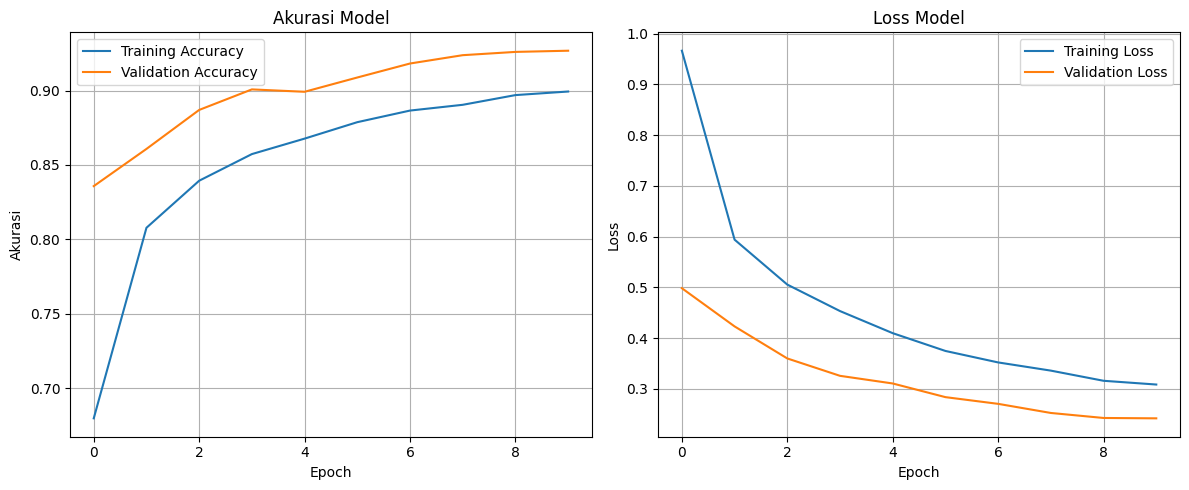

In [23]:
# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
train_loss, train_acc = model.evaluate(train_generator)
print(f"Akurasi di train set: {train_acc:.2%}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 238s 190ms/step - accuracy: 0.9630 - loss: 0.1372
Akurasi di train set: 96.39%


In [25]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Akurasi di val set: {val_acc:.2%}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step - accuracy: 0.9482 - loss: 0.1786
Akurasi di val set: 92.68%


In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi di test set: {test_acc:.2%}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.9468 - loss: 0.1644
Akurasi di test set: 92.62%


## Menyimpan Model

In [27]:
# Menyimpan model yang telah dilatih (termasuk arsitektur, bobot, dan konfigurasi training) ke dalam file bernama model.h5 dengan format HDF5
model.save("model.h5")

In [28]:
# Mengonversi model Keras (model.h5) ke format TensorFlow.js, sehingga bisa dijalankan di browser atau aplikasi JavaScript
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-06-04 11:32:23.513913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749036743.751130   24848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749036743.817377   24848 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [41]:
# Simpan model ke format SavedModel
save_path = "saved_model"
tf.saved_model.save(model, save_path)

print(f"Model berhasil disimpan dalam format SavedModel di folder: {save_path}")

Model berhasil disimpan dalam format SavedModel di folder: saved_model


In [30]:
print(train_generator.class_indices)

{'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


## Inference Model

In [42]:
# Upload file
uploaded = files.upload()

# Ambil nama file dari hasil upload
img_path = list(uploaded.keys())[0]
print("File uploaded:", img_path)

# Load gambar dengan path yang benar (file sudah ada di root folder)
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # jika model perlu normalisasi

# Load model SavedModel dengan TFSMLayer
from tensorflow import keras
saved_model_path = 'saved_model'
tfsmlayer = keras.layers.TFSMLayer(saved_model_path, call_endpoint='serving_default')
model = keras.Sequential([tfsmlayer])

# Prediksi
predictions = model.predict(img_array)
print(predictions)

Saving download (6).jpg to download (6).jpg
File uploaded: download (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
{'output_0': array([[5.5101568e-09, 9.9999750e-01, 3.1938811e-08, 3.0380004e-08,
        2.6498768e-08, 1.7589707e-08, 2.9624729e-08, 2.9403722e-08,
        1.9778149e-06, 5.3307053e-07]], dtype=float32)}


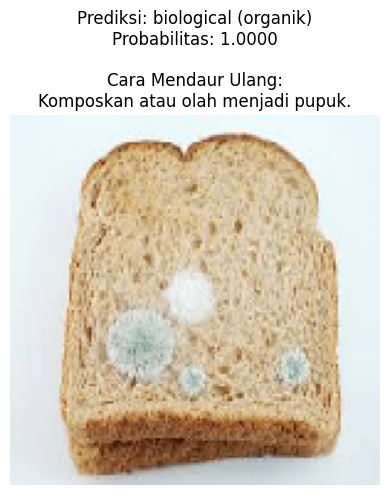

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_prediksi_daur_ulang(predictions, img):
    # Ambil output pertama dari predictions
    output_key = list(predictions.keys())[0]
    pred_array = predictions[output_key]

    # Label kelas dan remap ke kategori utama
    class_labels = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
    remap_dict = {
        'battery': 'residu',
        'biological': 'organik',
        'cardboard': 'anorganik',
        'clothes': 'residu',
        'glass': 'anorganik',
        'metal': 'anorganik',
        'paper': 'anorganik',
        'plastic': 'anorganik',
        'shoes': 'residu',
        'trash': 'residu'
    }

    # Info cara daur ulang per kategori utama
    daur_ulang_info = {
        'organik': 'Komposkan atau olah menjadi pupuk.',
        'anorganik': 'Pisahkan dan serahkan ke bank sampah/recycler.',
        'residu': 'Buang ke tempat sampah umum, hindari mencampur dengan sampah lain.'
    }

    # Prediksi kelas dan kategori utama
    predicted_class = np.argmax(pred_array, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    main_category = remap_dict[predicted_label]
    probability = pred_array[0][predicted_class[0]]

    # Ambil info daur ulang sesuai kategori utama
    daur_ulang_text = daur_ulang_info.get(main_category, 'Tidak ada info daur ulang.')

    # Tampilkan gambar dengan info prediksi dan daur ulang
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label} ({main_category})\nProbabilitas: {probability:.4f}\n\nCara Mendaur Ulang:\n{daur_ulang_text}")
    plt.show()

# Contoh pemakaian:
tampilkan_prediksi_daur_ulang(predictions, img)